# Supervised Learning: Solving Classificaiton Problems

## Challenge: Sentiment analysis with Naive Bayes

- Building a classfiier based on the UC Irvine's [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences).


We are looking specifcally at the **Amazon Reviews**

In [756]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [757]:
# Grab and process the data:
reviews_raw = pd.read_csv('/Users/pbhag/Thinkful/Supervised Learning - Solving Classification Problems/sentiment labelled sentences/amazon_cells_labelled.txt', delimiter = '\t')
reviews_raw.columns = ['review', 'positive']
reviews_raw['positive'] = (reviews_raw['positive'] == 1)


In [758]:
# Taking a look at the raw data:
reviews_raw.head()

,review,positive
0,"Good case, Excellent value.",True
1,Great for the jawbone.,True
2,Tied to charger for conversations lasting more...,False
3,The mic is great.,True
4,I have to jiggle the plug to get it to line up...,False


In [759]:
reviews_raw.shape

(999, 2)

In [760]:
keywords = ['good','fantastic', 'like','best','easy','nice','great','perfect','recommend', 'easier','love'
            ,'Beautiful',' satisfied','must have', 'happy','brilliant','well made','adorable','excellent'
           ,'priced right','quickly','comfort','sturdy','seamless','helpful','superb','tremendous','best','bargain',
            'waste','fool','do not buy','poor','disappoint',' impressed','keen','ideal','winner','favorite','no problem',
            'works well','happy','Incredible','wonderful','not good','breaks','cheap','terrible','not','better']
for key in keywords:
        reviews_raw[str(key)] = reviews_raw.review.str.contains(str(key),
        case = False)




        

Looking at how our reviews_raw data frame looks now, with features added:

In [761]:
reviews_raw.head()

,review,positive,good,fantastic,like,best,easy,nice,great,perfect,...,no problem,works well,Incredible,wonderful,not good,breaks,cheap,terrible,not,better
0,"Good case, Excellent value.",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Great for the jawbone.,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,The mic is great.,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [762]:
# Create two dataframes that will be used to model positive and negative reviews:
reviews_pos = reviews_raw.query('positive == True ')
reviews_neg = reviews_raw.query('positive == False ')


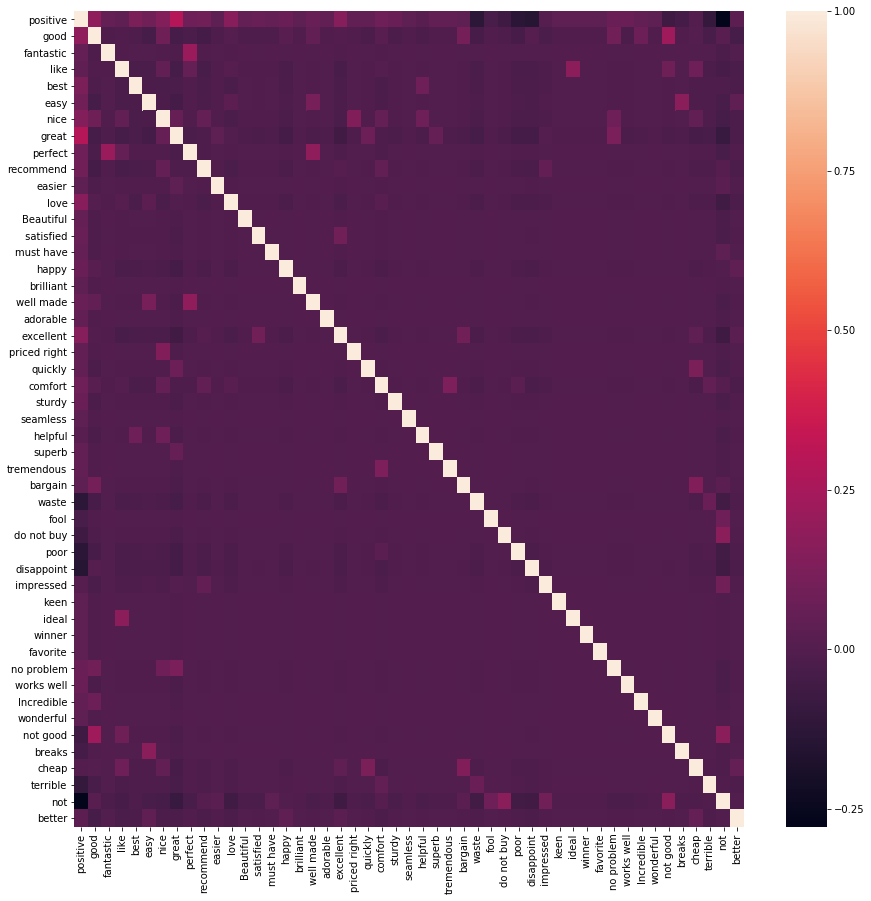

In [763]:
plt.figure(figsize=(15,15))
sns.heatmap(reviews_raw.corr())
plt.show()

Looks like none of the keywords are strongly correlated with each other, demonstrating independence of variables. 

Before we actually run the model we have to build out our training data. SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). We'll do that below under the titles `data` and `target`

In [764]:
data = reviews_raw[keywords]
target = reviews_raw['positive']

In [765]:
# Our data is binary/boolean, so we will be importing the Bernoulli Classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable. 
bnb = BernoulliNB()
# Fit our model to the data
bnb.fit(data, target)
# Classify, storing the result in a new variable called y_pred. 
y_pred = bnb.predict(data)
# Display our results
print("Number of mislabeled points out of a total {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Number of correctly labeled points out of a total {} points: {}".format(
    data.shape[0],
    (y_pred == target).sum()
))

Number of mislabeled points out of a total 999 points: 195
Number of correctly labeled points out of a total 999 points: 804


The accuracy of this model is:
- Based on mislabeled points: 1 - 195/999 = 80.5%
- Based on correctly labeled points: 804/999 = 80.5%

</br> looks like 80.5% of the points in the data set were correctly labeled by the model as positive or negative reviews 

To check how well the model predicted the positive reviews and negative reviews, we will use a confusion matrix to evaluate a models results.

For reference: 
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing

Heres an example of a confusion matrix for a binary classifier (appicable to our case, as we are using the BernoulliNB classifier)

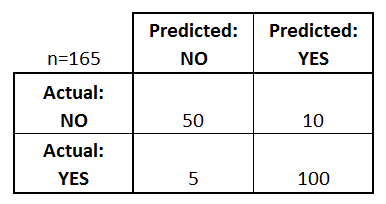


In [766]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)


                # Predicted
#Actual        False         True
#False      True Neg        False Pos
#True         False Neg      True Pos


array([[477,  22],
       [173, 327]])

Calculating the **Sensitivity**, the percentage of positives correctly identified: 

(calculated by taking the predicted true positives divided by the number of actual positives)

In [767]:
print("Sensitivity:")
print(327/(327 + 173))

Sensitivity:
0.654


Calculating the **Specificity**, the percentage of negatives correctly identified: 

(Calculated by taking the number of predicted true negatives divided by the number of actual negatives)

In [768]:
print("Specificity:")
print(477/(477+22))

Specificity:
0.9559118236472945


## In-sample evaluation and cross-validation

### Testing for overfitting: Holdout Groups
To combat overfitting (when your model is so excessively complex that it starts to catch random noise instead of describing the true underlying relationships).

A holdout group is a reserved amount of data that is used for testing. 30% is a common starting point, but really anything from 50% to 1% of the original dataset could be reasonable

In [769]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.815
Testing on Sample: 0.8048048048048048


### Cross-validation:

Essentially multiple holdout groups, or **folds**. 

The way it works is this: start by breaking up your data into several equally sized pieces, or __folds__. Let's say you make _x_ folds. You then go through the training and testing process _x_ times, each time with a different fold held out from the training data and used as the test set. The number of folds you create is up to you, but it will depend on how much data you want in your testing set. At its most extreme, you're creating the same number of folds as you have observations in your data set. This kind of cross validation has a special name: __Leave One Out__. Leave one out is useful if you're worried about single observations skewing your model, whereas large folds combat more general overfitting.

In [770]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.84      , 0.8       , 0.82      , 0.77      , 0.81      ,
       0.74      , 0.76      , 0.72      , 0.8       , 0.74747475])

# Challenge: evaluate your sentiment classifier
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:
- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

### Re-engineering the features:

We will be parsing through all the positive and negative reviews and looking at the words most common to each of those reviews. 

In [771]:
# Grab and process the data:
amazon = pd.read_csv('/Users/pbhag/Thinkful/Supervised Learning - Solving Classification Problems/sentiment labelled sentences/amazon_cells_labelled.txt', delimiter = '\t')
amazon.columns = ['review', 'positive']
amazon['positive'] = (amazon['positive'] == 1)


In [772]:
# Feature re-engineering:
# Preprocessing the reviews:
# Frst, lowercase all rows:
amazon.review = amazon.review.str.lower()
# Then, remove the punctuation from the strings, by creating a table that has the characters we want to remove:
table = str.maketrans("!?.\/*()", 8*" ") 
amazon.review = amazon.review.str.translate(table)

# Create an array of the words used in positive reviews:
# Then, take all the positive reviews and make them one long string and split it:
goodwords = amazon.review[amazon.positive == 1].str.cat(sep=" ").split()

# Create another array, of words used in negative reviews:
badwords = amazon.review[amazon.positive == 0].str.cat(sep=' ').split()

In [773]:
#Unique words from goodwords and badwords:
print('Positive:', len(np.unique(goodwords)), 'Negative:', len(np.unique(badwords)))

Positive: 1222 Negative: 1377


In [774]:
# Creating arrays that contain lists of words unique to goodwords and badwords
# We will use the np.setdiff1d() method, which returns the set difference between 
# two arrays

# Words unique to the good words
gooddiff = np.setdiff1d(ar1=pd.Series(goodwords).value_counts().keys(),
                        ar2=pd.Series(badwords).value_counts().keys())

# Words unique to the bad words
baddiff = np.setdiff1d(ar1=pd.Series(badwords).value_counts().keys(),
                   ar2=pd.Series(goodwords).value_counts().keys())
    
    

In [775]:
# Reduce gooddiff to list of words that occur three or more times:

good_df = pd.DataFrame(goodwords)
good_freq = good_df[good_df[0].isin(gooddiff)]
good_rank = pd.DataFrame(good_freq[0].value_counts()).reset_index()
top_good = good_rank[good_rank[0] >= 3]['index']
top_good.ravel()

array(['works', 'best', 'love', 'nice', 'fine', 'definitely', 'awesome',
       'sturdy', 'cases', 'pleased', 'perfectly', 'priced', 'seller',
       'order', 'charm', 'satisfied', 'seems', 'glad', 'value', 'fast',
       'free', 'range', 'family', 'leather', 'keyboard', 'overall,',
       'rocks', 'jawbone', 'pc', 'well,', 'sharp', 'features',
       'reasonably', 'noise', 'instead', 'setup', 'fantastic',
       'comfortably', 'market', 'beautiful', 'handsfree', 'happier'],
      dtype=object)

Removing the contextual and incidental words from the list, leaving the more descriptively "good" words that will be used to predict positive reviews:
(removing words like 'cases', 'priced', 'seller', 'order', 'seems', 'free', 'range', 'family', 'leather', 'keyboard', 'overall', 'jawbone', 'pc, 'setup', 'market','instead', 'handsfree', etc)

In [776]:
good_key = ['works', 'best', 'love', 'nice', 'fine', 'definitely', 'awesome',
            'sturdy', 'pleased', 'perfectly', 'charm', 'satisfied', 'glad', 
            'value', 'fast', 'free', 'range','rocks', 'well',
            'reasonably', 'fantastic','comfortably', 'beautiful', 'happier']

In [777]:
# Reduce baddiff into a list of words that occur three or more times
 
bad_df = pd.DataFrame(badwords)
bad_freq = bad_df[bad_df[0].isin(baddiff)]
bad_rank = pd.DataFrame(bad_freq[0].value_counts()).reset_index()
top_bad = bad_rank[bad_rank[0] >= 3]['index']
top_bad.ravel()


array(['waste', 'poor', 'worst', 'bad', 'terrible', 'disappointed',
       'broke', "didn't", 'junk', 'unit', 'crap', 'horrible', 'stay',
       'useless', 'difficult', '1', 'disappointing', 'easily', 'return',
       'none', 'week', 'anything', 'disappointment', 'goes', 'buying',
       'cingular', 'unfortunately', 'unreliable', 'later', 'support',
       'weak', 'instructions', 'old', 'mistake', 'hate', 'might', 'break',
       'above', 'pay', 'drain', 'slow', 'dead', 'once', 'match', 'sprint',
       'dont', 'may', 'poorly', 'turned', 'longer', 'plugged', 'lost',
       'beep', 'weeks', 'failed', 'refund', 'care', 'experience', 'sucks',
       'player', 'wrong', 'coverage'], dtype=object)

Once again, removing contextual and incidental words:

In [778]:
bad_key = ['waste', 'poor', 'worst', 'bad', 'terrible', 'disappointed',
           'broke', 'junk',  'crap', 'horrible',
           'useless', 'difficult', 'disappointing', 'return',
           'anything', 'disappointment', 'unfortunately', 'unreliable',
           'weak', 'old', 'mistake', 'hate', 'break', 'drain', 'slow', 'dead', 
           'dont', 'poorly', 'longer', 'lost','failed', 
           'refund', 'sucks', 'player', 'wrong', 
          ]

### Naive Bayes model, now using re-engineered positive keywords:

Now running the features into our model:


In [779]:
# Create new dataframe with the re-engineered good words:
amazon_pos = amazon.copy()
for key in good_key:
        amazon_pos[str(key)] = amazon_pos.review.str.contains(str(key),
        case = False)

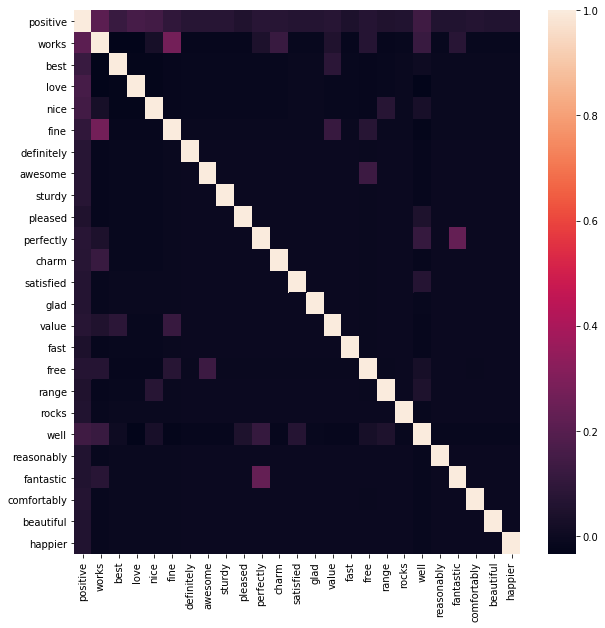

In [780]:
plt.figure(figsize = (10,10))
sns.heatmap(amazon_pos.corr())
plt.show()

Looks like variables are pretty independent, with the exception of some words. 

Preparing the Bernoulli Naive Bayes arguments:

In [781]:
data = amazon_pos[good_key]
target = amazon_pos['positive']

bnb.fit(data, target)
y_pred = bnb.predict(data)


print('\n')
print("Number of mislabeled points out of a total {} points : {}".format(
       data.shape[0], 
       (target != y_pred).sum()
    ))
    
cvs = cross_val_score(bnb, data, target, cv=10)
print("Cross Validation Scores (10 Folds):", cvs)
    
print("Averaged Cross-Validation Score: ", cvs.mean())
    
print("Bernoulli Naïve Bayes Score: ", bnb.score(data, target))
print("Confusion Matrix:\n", confusion_matrix(target, y_pred))



Number of mislabeled points out of a total 999 points : 312
Cross Validation Scores (10 Folds): [0.75       0.72       0.68       0.68       0.72       0.71
 0.62       0.66       0.67       0.64646465]
Averaged Cross-Validation Score:  0.6856464646464646
Bernoulli Naïve Bayes Score:  0.6876876876876877
Confusion Matrix:
 [[482  17]
 [295 205]]


### Naive Bayes, using re-engineered negative keywords:

In [782]:
amazon_neg = amazon.copy()

for key in bad_key:
        amazon_neg[str(key)] = amazon_neg.review.str.contains(str(key),
        case = False)

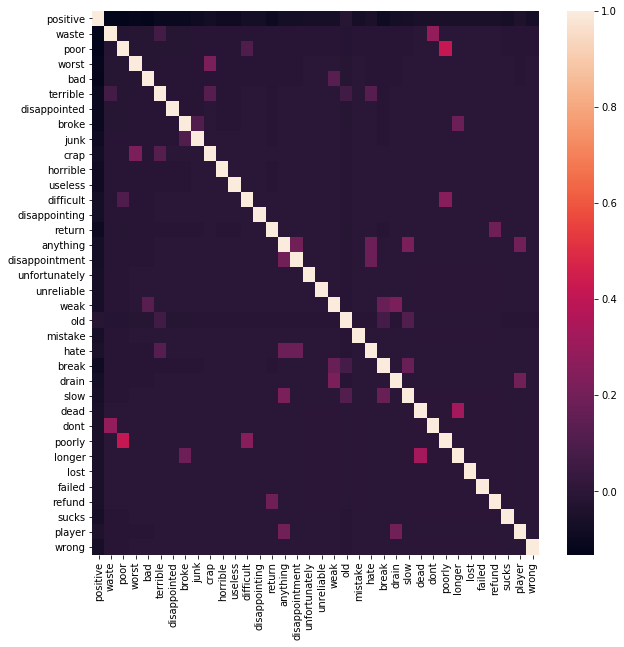

In [783]:
plt.figure(figsize = (10,10))
sns.heatmap(amazon_neg.corr())
plt.show()

Looks like variables are fairly independent, with the exception of some slightly correlated words. On to the Naive Bayes arguments:


In [784]:
data = amazon_neg[bad_key]
target = amazon_neg['positive']

bnb.fit(data, target)
y_pred = bnb.predict(data)



print('\n')
print("Number of mislabeled points out of a total {} points : {}".format(
       data.shape[0], 
       (target != y_pred).sum()
    ))
    
cvs = cross_val_score(bnb, data, target, cv=10)
print("Cross Validation Scores (10 Folds):", cvs)
    
print("Averaged Cross-Validation Score: ", cvs.mean())
    
print("Bernoulli Naïve Bayes Score: ", bnb.score(data, target))
print("Confusion Matrix:\n", confusion_matrix(target, y_pred))



Number of mislabeled points out of a total 999 points : 307
Cross Validation Scores (10 Folds): [0.66       0.65       0.75       0.75       0.73       0.68
 0.67       0.64       0.72       0.67676768]
Averaged Cross-Validation Score:  0.6926767676767677
Bernoulli Naïve Bayes Score:  0.6926926926926927
Confusion Matrix:
 [[194 305]
 [  2 498]]
